## Loan : Risk Analysis 
### Problem Statement:
#### Risk analytics in banking and financial services and understand how data is used to minimize the risk of losing money while lending to customers.

## Reading and Understanding data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df=pd.read_csv(r'C:\Users\muskan\Desktop\projects DS\loan.csv')

c:\users\muskan\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (25,32,34,44,47,51) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.shape

(39717, 111)

In [4]:
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
#### drop those columns which are completely null ####
df.dropna(axis=1,how='all',inplace=True)

In [6]:
df.shape

(39717, 61)

In [7]:
df.isnull().sum()

id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
                            ...  
chargeoff_within_12_mths       56
delinq_amnt                     1
percent_bc_gt_75            39716
pub_rec_bankruptcies          697
tax_liens                      40
Length: 61, dtype: int64

In [8]:
#### drop those where max is null but not all null 
df.drop(['next_pymnt_d','mths_since_last_delinq','mths_since_last_record'],axis=1).head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,policy_code,application_type,verification_status_joint,acc_now_delinq,bc_util,chargeoff_within_12_mths,delinq_amnt,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,1,INDIVIDUAL,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1,INDIVIDUAL,NaN,0.0,NaN,0.0,0.0,NaN,0.0,0.0


In [9]:
#### relevent columns
df=df.drop(['id','member_id','funded_amnt','emp_title','pymnt_plan','url','zip_code','mths_since_last_delinq','mths_since_last_record','initial_list_status','next_pymnt_d','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','pub_rec_bankruptcies','tax_liens','delinq_amnt','chargeoff_within_12_mths','mths_since_last_major_derog',
'verification_status_joint','bc_util','percent_bc_gt_75'],axis=1)

In [10]:
df.shape

(39717, 38)

In [11]:
df.isnull().sum()

loan_amnt                      0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
desc                       12940
purpose                        0
title                         11
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_

# Plotting 

In [12]:
df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'desc', 'purpose',
       'title', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'],
      dtype='object')

In [13]:
df['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [14]:
df.groupby(by=df['verification_status']).count()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
verification_status,,,,,,,,,,,,,,,,,,,,,
Not Verified,16921,16921,16921,16921,16921,16921,16921,16498,16921,16921,...,16921,16921,16921,16921,16921,16921,16921,16884,16921,16919
Source Verified,9987,9987,9987,9987,9987,9987,9987,9791,9987,9987,...,9987,9987,9987,9987,9987,9987,9987,9973,9987,9987
Verified,12809,12809,12809,12809,12809,12809,12809,12353,12809,12809,...,12809,12809,12809,12809,12809,12809,12809,12789,12808,12809


In [15]:
df['annual_inc'].unique()

array([24000., 30000., 12252., ..., 33990., 36153., 27376.])

c:\users\muskan\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


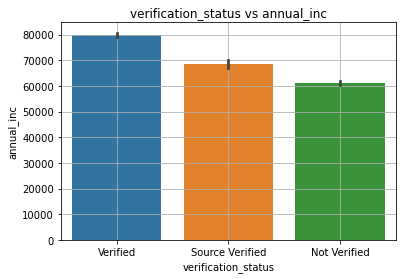

In [16]:
plt.title('verification_status vs annual_inc')
sb.barplot(df['verification_status'],df['annual_inc'])
plt.grid()

c:\users\muskan\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


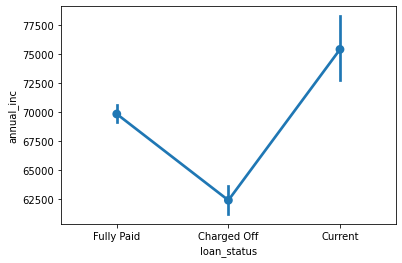

In [17]:
sb.pointplot(df['loan_status'],df['annual_inc'])

# 1)
#### if annual income is 70k -80k its verification status is verified , if 60.5k - 70k it is source verified ,if 60k- 60.5k it is not verified
#### if annual_inc lies below 60.5k(not verified) then it is surely charge off i.e it becomes defaulter for sure
##### so company should not give loan to people whose annual_income is lesser than 60.5 due to highest  financial risk 

In [18]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [19]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [20]:
a=pd.crosstab(df['loan_status'],df['term'])

In [21]:
a

term,36 months,60 months
loan_status,,
Charged Off,3227,2400
Current,0,1140
Fully Paid,25869,7081


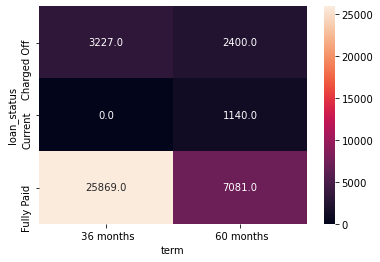

In [22]:
sb.heatmap(a,annot=True,fmt='.1f')

c:\users\muskan\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


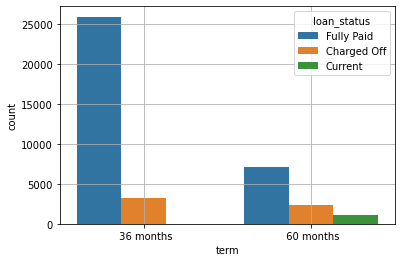

In [23]:
sb.countplot(df['term'],hue=df['loan_status'])
plt.grid()

# 2)
#### people who take loans for 36 months are more likely to pay fully but people who took loan for 36 months are more likely to charge_off as compared to people charge off for 60 months

In [24]:
df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'desc', 'purpose',
       'title', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'],
      dtype='object')

c:\users\muskan\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


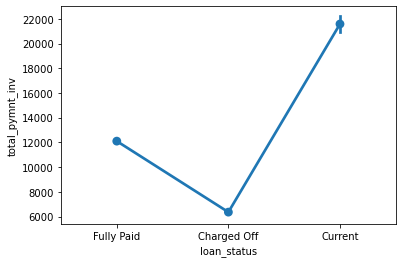

In [25]:
sb.pointplot(df['loan_status'],df['total_pymnt_inv'])

# 3)
####  people who make payment_inv between 6k to 8k are charged off that is they are defalters 

c:\users\muskan\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


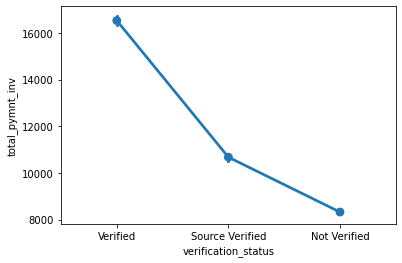

In [26]:
sb.pointplot(df['verification_status'],df['total_pymnt_inv'])

c:\users\muskan\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


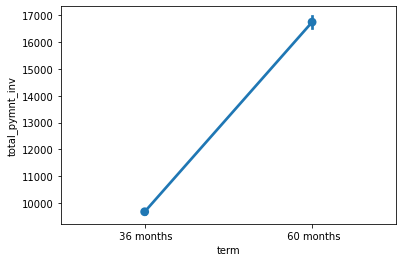

In [27]:
sb.pointplot(df['term'],df['total_pymnt_inv'])

# 4)
#### people invested only upto 10k in 36 mnth term and upto 17k in 60 mnth term 

In [28]:
df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'desc', 'purpose',
       'title', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'],
      dtype='object')

c:\users\muskan\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


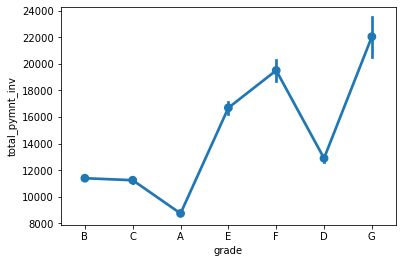

In [29]:
sb.pointplot(df['grade'],df['total_pymnt_inv'])

# 5)
#### total_pymnt_inv is higher for grade " G " people

In [30]:
df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'desc', 'purpose',
       'title', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'],
      dtype='object')

c:\users\muskan\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


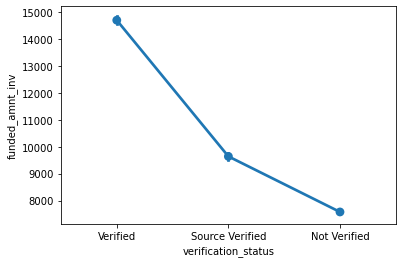

In [31]:
sb.pointplot(df['verification_status'],df['funded_amnt_inv'])

# 6)
#### if the source is verified then funded_amnt_inv i.e amount promised by investor is high as compared to not verified

In [32]:
df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'desc', 'purpose',
       'title', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'],
      dtype='object')

In [33]:
len(df['installment'].unique())

15383

c:\users\muskan\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


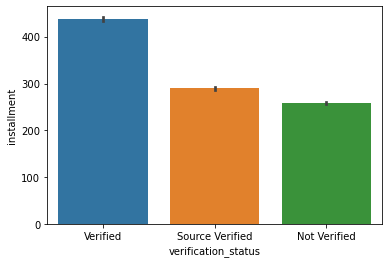

In [34]:
sb.barplot(df['verification_status'],df['installment'])

In [35]:
df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'desc', 'purpose',
       'title', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'],
      dtype='object')

In [36]:
ct=pd.crosstab(index=df['grade'],columns=df['verification_status'],values=df['total_pymnt_inv'],aggfunc=np.mean)

In [37]:
ct

verification_status,Not Verified,Source Verified,Verified
grade,,,
A,7244.166045,8969.097734,11800.123675
B,8810.439286,10385.912287,16013.653311
C,8108.163975,10441.432325,16048.079369
D,9090.663436,11606.475712,17551.593977
E,10532.234710,13652.793094,21179.412683
F,11469.299653,16847.043240,23163.254261
G,16035.939091,16125.939714,25408.345347


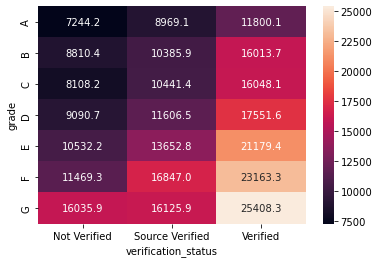

In [38]:
sb.heatmap(ct,annot=True,fmt='.1f')

# 7)
####  even if the verification_status is "" not verified "" then also if the grade is " G " it got high "total_pymnt_inv" 

In [39]:
ct4=pd.crosstab(index=df['grade'],columns=df['loan_status'],values=df['total_pymnt_inv'],aggfunc=np.mean)

In [40]:
ct4

loan_status,Charged Off,Current,Fully Paid
grade,,,
A,4184.585100,11311.635000,9019.897652
B,5606.588758,20134.603188,11902.616820
C,5550.368330,20727.133258,12037.224080
D,6437.168980,20542.297162,14284.913343
E,8695.592154,24696.827318,18893.157603
F,10989.934671,30790.382329,22388.066880
G,9158.500396,29637.698235,27969.865909


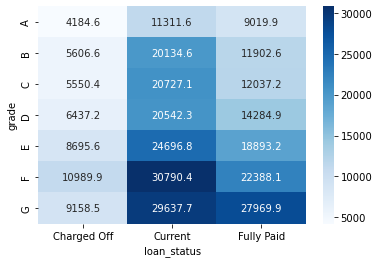

In [41]:
sb.heatmap(ct4,annot=True,fmt='.1f',cmap='Blues')

# 8)
#### people who pay high amount also charge off if belong to grade "" F""

c:\users\muskan\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text major ticklabel objects>)

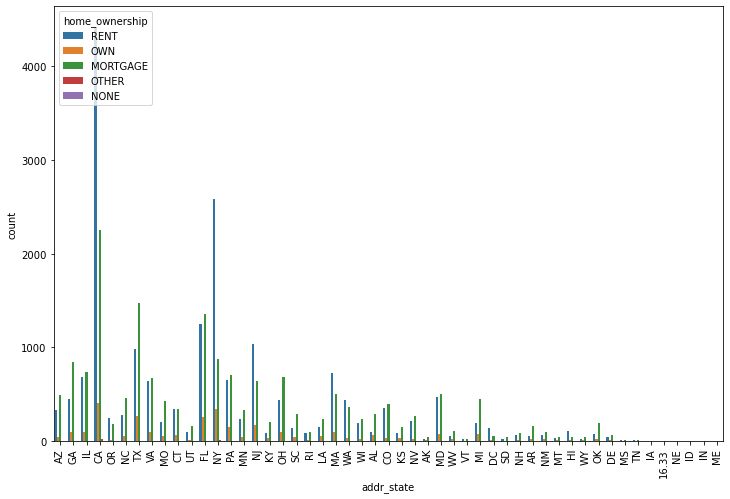

In [42]:
plt.figure(figsize=(12,8))
sb.countplot(df['addr_state'],hue=df['home_ownership'])
plt.xticks(rotation=90)

In [43]:
df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [44]:
df['annual_inc'].unique()

array([24000., 30000., 12252., ..., 33990., 36153., 27376.])

In [45]:
df['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

c:\users\muskan\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


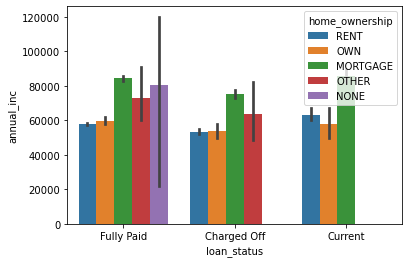

In [46]:
sb.barplot(df['loan_status'],df['annual_inc'],hue=df['home_ownership'])

# 9)
#### person having home_ownership as " mortage " and annual_inc between 60k -80k is charged_off usually means proved as defaulter

In [47]:
ct1=pd.crosstab(index=df['emp_length'],columns=df['verification_status'],values=df['total_pymnt_inv'],aggfunc=np.mean)

In [48]:
ct1

verification_status,Not Verified,Source Verified,Verified
emp_length,,,
1 year,7608.197964,9756.304952,14848.675316
10+ years,9102.438317,12108.784060,18679.660238
2 years,7905.013905,10246.570228,15294.427764
3 years,8267.231584,10151.587063,15968.206939
4 years,8539.870061,10269.493845,16232.674809
5 years,8717.471551,11607.414916,16280.454884
6 years,8779.933002,10902.581873,17170.694360
7 years,9010.186821,11316.950724,17056.748390
8 years,9014.125048,11684.236725,16741.973710


c:\users\muskan\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

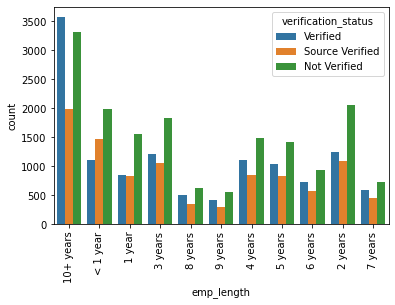

In [49]:
sb.countplot(df['emp_length'],hue=df['verification_status'])
plt.xticks(rotation=90)

In [50]:
df['recoveries'].unique()

array([  0.  , 117.08, 189.06, ..., 304.2 ,  35.7 ,  21.29])

In [51]:
df['addr_state'].unique()

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', '16.33', 'NE', 'ID', 'IN', 'ME'], dtype=object)

c:\users\muskan\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text major ticklabel objects>)

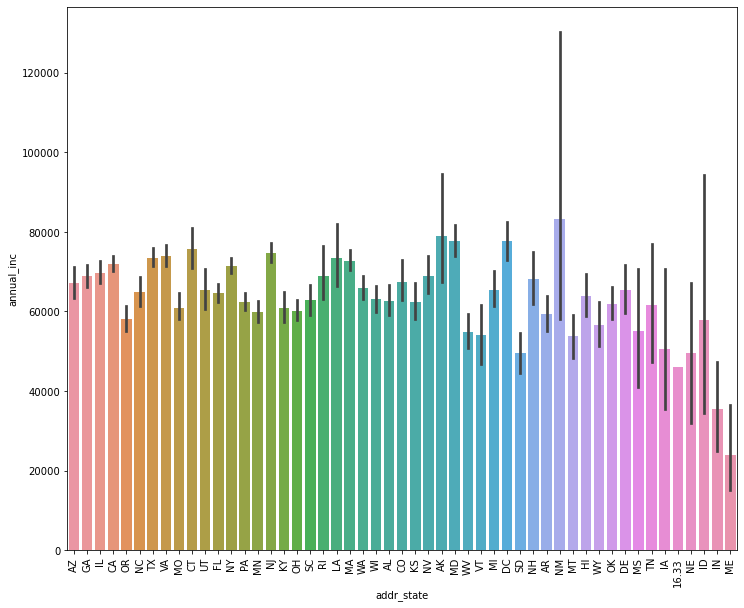

In [52]:
plt.figure(figsize=(12,10))
sb.barplot(df['addr_state'],df['annual_inc'])
plt.xticks(rotation=90)

# 10)
#### addr_state ===" NM" and " AK" has highest annual income and high annual income has more fully verified thus more good states to grant loan 

In [53]:
df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'desc', 'purpose',
       'title', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'],
      dtype='object')

In [54]:
df['recoveries'].unique()

array([  0.  , 117.08, 189.06, ..., 304.2 ,  35.7 ,  21.29])

c:\users\muskan\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


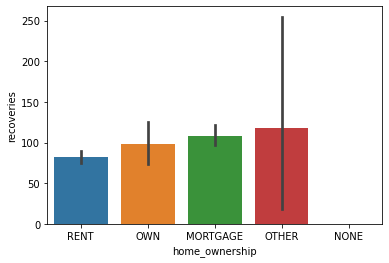

In [55]:
sb.barplot(df['home_ownership'],df['recoveries'])

# 11)
#### people has house_ownership "" other """  has better recoveries

In [56]:
ct2=pd.crosstab(index=df['grade'],columns=df['home_ownership'],values=df['recoveries'],aggfunc=np.mean)

In [57]:
ct2

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT
grade,,,,,
A,16.125960,0.0,0.000000,33.802099,23.088670
B,70.734300,0.0,319.523703,73.368634,44.100826
C,127.787725,NaN,26.838750,76.745524,88.471628
D,166.224532,NaN,31.694118,164.852196,119.748351
E,259.438001,NaN,57.625714,284.196244,209.423089
F,598.896358,NaN,5.310000,321.005000,329.301447
G,437.461830,NaN,NaN,684.646957,358.064571


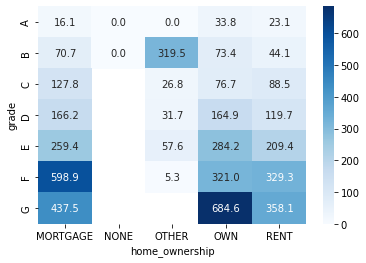

In [58]:
sb.heatmap(ct2,annot=True,cmap='Blues',fmt='.1f')

# 12)
#### people having house_ownership as """ own """ has best recovery and people having house_ownership as ""mortage"" belongs to grade "" f"" has second best recovery of loan 

In [59]:
df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'desc', 'purpose',
       'title', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'],
      dtype='object')

In [60]:
df['total_rec_late_fee'].unique()

array([ 0.        , 16.97      , 15.00000003, ...,  1.69      ,
        1.36      , 19.89      ])

In [61]:
df['revol_bal'].unique()

array([13648, 1687, 2956, ..., '9698', '85607', '4175'], dtype=object)

In [62]:
ct5=pd.crosstab(index=df['emp_length'],columns=df['loan_status'],values=df['annual_inc'],aggfunc=np.mean)

In [63]:
ct5

loan_status,Charged Off,Current,Fully Paid
emp_length,,,
1 year,54242.439211,71877.098592,63815.238231
10+ years,72578.473546,84717.607519,83239.595595
2 years,57409.903210,71128.679381,63963.024890
3 years,59601.141297,71285.410843,67832.856668
4 years,64417.025346,65441.585106,66968.616052
5 years,64249.784192,75597.567727,68653.557350
6 years,66101.841694,74240.295082,68329.710623
7 years,62575.109810,67533.018710,70417.223646
8 years,67778.180099,79985.363636,75520.273036


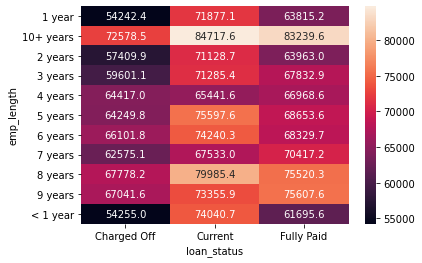

In [64]:
sb.heatmap(ct5,annot=True,fmt='.1f')

# 13)
#### person will charge off if emp_length is 10+years ,even if annual_inc is high